In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
import math
import scipy.stats as st


In [39]:
df = pd.read_csv('data.csv')
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close_ETF  1000 non-null   float64
 1   oil        1000 non-null   float64
 2   gold       1000 non-null   float64
 3   JPM        1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


# Part 7

** H0: Mu_G == Mu_O **

** Ha: Mu_G != Mu_O **


In [41]:
stats.ttest_ind(df.gold,df.oil)

Ttest_indResult(statistic=-0.485366608948659, pvalue=0.6274695292874639)

Since P is 0.627, which is larger than 0.05. Therefore we will not reject the null hypothesis at this case. 

** H0: Mu_G - Mu_O == 0**

** Ha: Mu_G - Mu_O != 0 **

In [42]:
mean_diff = df.oil - df.gold

In [43]:
stats.ttest_1samp(mean_diff,0)

Ttest_1sampResult(statistic=0.5413309223847729, pvalue=0.5884002046805893)

Since P is 0.588, which is larger than 0.05. Therefore we will not reject the null hypothesis at this case. 

** H0: sigma_G == sigma_O **

** Ha: sigma_G != sigma_O **


In [62]:
std_gold = st.sem(df.gold)
std_oil = st.sem(df.oil)

In [66]:
F = (std_gold)**2 / (std_oil)**2

In [70]:
stats.f.cdf(F, 999, 999)

3.942300247719849e-82

Since P value is way less 0.05, so we would reject the null hypothesis at this case. 

# Part 8

Text(0.5, 1.0, 'Scatter Plot for Close_ETF and gold')

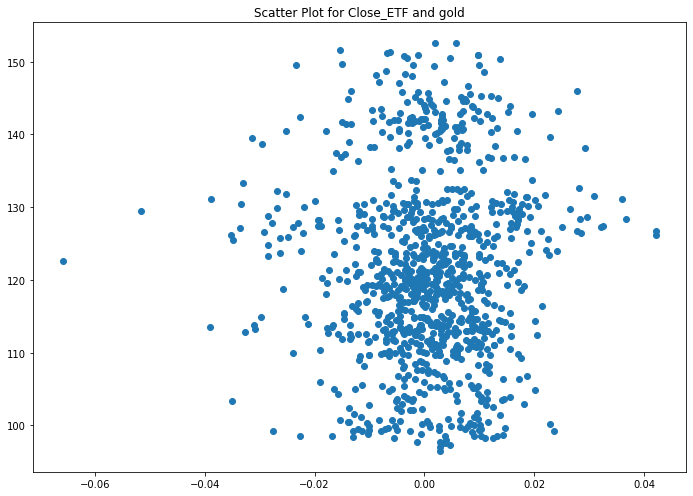

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(df.gold,df.Close_ETF)
plt.title('Scatter Plot for Close_ETF and gold')

There doesn't seem to have a linear relationship between the two variable. 

In [45]:
np.corrcoef(df.gold,df.Close_ETF)

array([[1.        , 0.02299557],
       [0.02299557, 1.        ]])

The coefficient seems very small, it's only 0.022, this is an indication that there is a weak linear relationship between the two columns. 

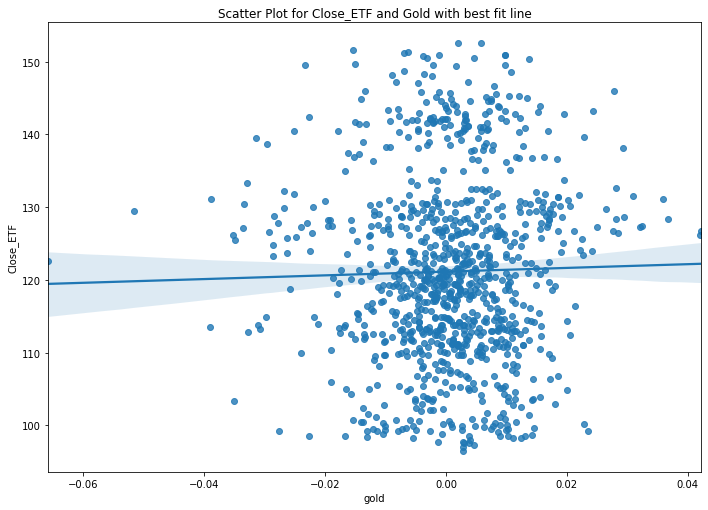

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.regplot(x = df.gold,y = df.Close_ETF)
plot = plt.title('Scatter Plot for Close_ETF and Gold with best fit line')

In [47]:
np.polyfit(x = df.gold,y = df.Close_ETF,deg=1)

array([ 25.60438932, 121.1359885 ])

The regression line is Close_ETF = 25.60438932*gold + 121.1359885

In [48]:
def linear_eqt(x):
    return(25.60438932*x + 121.1359885)


In [49]:
Close_ETF = df.Close_ETF.tolist()

In [50]:
pred_ETF = []
for i in range(1000):
    pred_ETF.append(linear_eqt(df.gold[i]))


In [51]:
corr_matrix = np.corrcoef(Close_ETF, pred_ETF)
corr = corr_matrix[0,1]
R_sq = corr**2

In [52]:
print(R_sq)

0.0005287962431227513


No, it's not a good model, the R^2 is extremely small that means there is a really weak linear relationship between Close_ETF and gold. 

I assumed there is a weak relationship between Close_ETF and gold, and the result is as expected as my assumption, the linear relationship is really weak.  

In [54]:
# CI for mean daily ETF 
st.norm.interval(alpha=0.99, loc=linear_eqt(np.mean(df.gold)), scale= st.sem(pred_ETF))

(121.12941552280834, 121.17650450338938)

In [59]:
# CI for individual daily ETF 
st.norm.interval(alpha = 0.99,loc = linear_eqt(0.005127), scale = st.sem(pred_ETF))

(121.24371771375311, 121.29080669433415)

# Part 9

In [85]:
from sklearn import linear_model
import statsmodels.api as sm

In [76]:
X = df[['gold','oil']]
Y = df['Close_ETF']

In [80]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [83]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 121.14272529623004
Coefficients: 
 [29.62259192 -9.12610011]


In [87]:
X = sm.add_constant(X)

In [89]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 

In [91]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Thu, 19 Nov 2020   Prob (F-statistic):              0.688
Time:                        15:01:52   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.0

Here the adjusted R^2 is -0.001, which means I have choosen a model that its fit is worse than a horizontal line. In other word, this model is worse than the original model with only gold and Close_ETF in terms of the fitting accuracy. 